# Tes `SORA` dengan data SAO 158379

In [1]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [2]:
df = pd.read_csv('sao-158379.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-target
1195,3996.0,[12:57:20.9035],15561.0
1196,3997.0,[12:57:20.9235],-191.0
1197,3998.0,[12:57:20.9436],-2107.0
1198,3999.0,[12:57:20.9636],5244.0
1199,4000.0,[12:57:20.9836],8405.0


In [3]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-target
1195,3996.0,2022-07-31 12:57:20.903500,15561.0
1196,3997.0,2022-07-31 12:57:20.923500,-191.0
1197,3998.0,2022-07-31 12:57:20.943600,-2107.0
1198,3999.0,2022-07-31 12:57:20.963600,5244.0
1199,4000.0,2022-07-31 12:57:20.983600,8405.0


In [4]:
data = df[['FrameNum','timeInfo','signal-target']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
1195,3996.0,2022-07-31 12:57:20.903500,15561.0
1196,3997.0,2022-07-31 12:57:20.923500,-191.0
1197,3998.0,2022-07-31 12:57:20.943600,-2107.0
1198,3999.0,2022-07-31 12:57:20.963600,5244.0
1199,4000.0,2022-07-31 12:57:20.983600,8405.0


In [5]:
data['JD'] = Time(data['Time']).jd

data['frac_JD'] = data['JD'] - np.floor(data['JD']).astype(int)
data

,Frame,Time,Value,JD,frac_JD
0,2801.0,2022-07-31 12:56:56.957200,417856.0,2459792.039548116,0.03954811580479145
1,2802.0,2022-07-31 12:56:56.977300,331218.0,2459792.039548348,0.03954834816977382
2,2803.0,2022-07-31 12:56:56.997300,382878.0,2459792.03954858,0.039548580069094896
3,2804.0,2022-07-31 12:56:57.017400,383219.0,2459792.0395488124,0.03954881243407726
4,2805.0,2022-07-31 12:56:57.037400,373990.0,2459792.039549044,0.039549043867737055
...,...,...,...,...,...
1195,3996.0,2022-07-31 12:57:20.903500,15561.0,2459792.039825272,0.03982527181506157
1196,3997.0,2022-07-31 12:57:20.923500,-191.0,2459792.0398255032,0.03982550324872136
1197,3998.0,2022-07-31 12:57:20.943600,-2107.0,2459792.039825736,0.039825736079365015
1198,3999.0,2022-07-31 12:57:20.963600,5244.0,2459792.0398259675,0.03982596751302481


Text(0.5, 0, 'Frames')

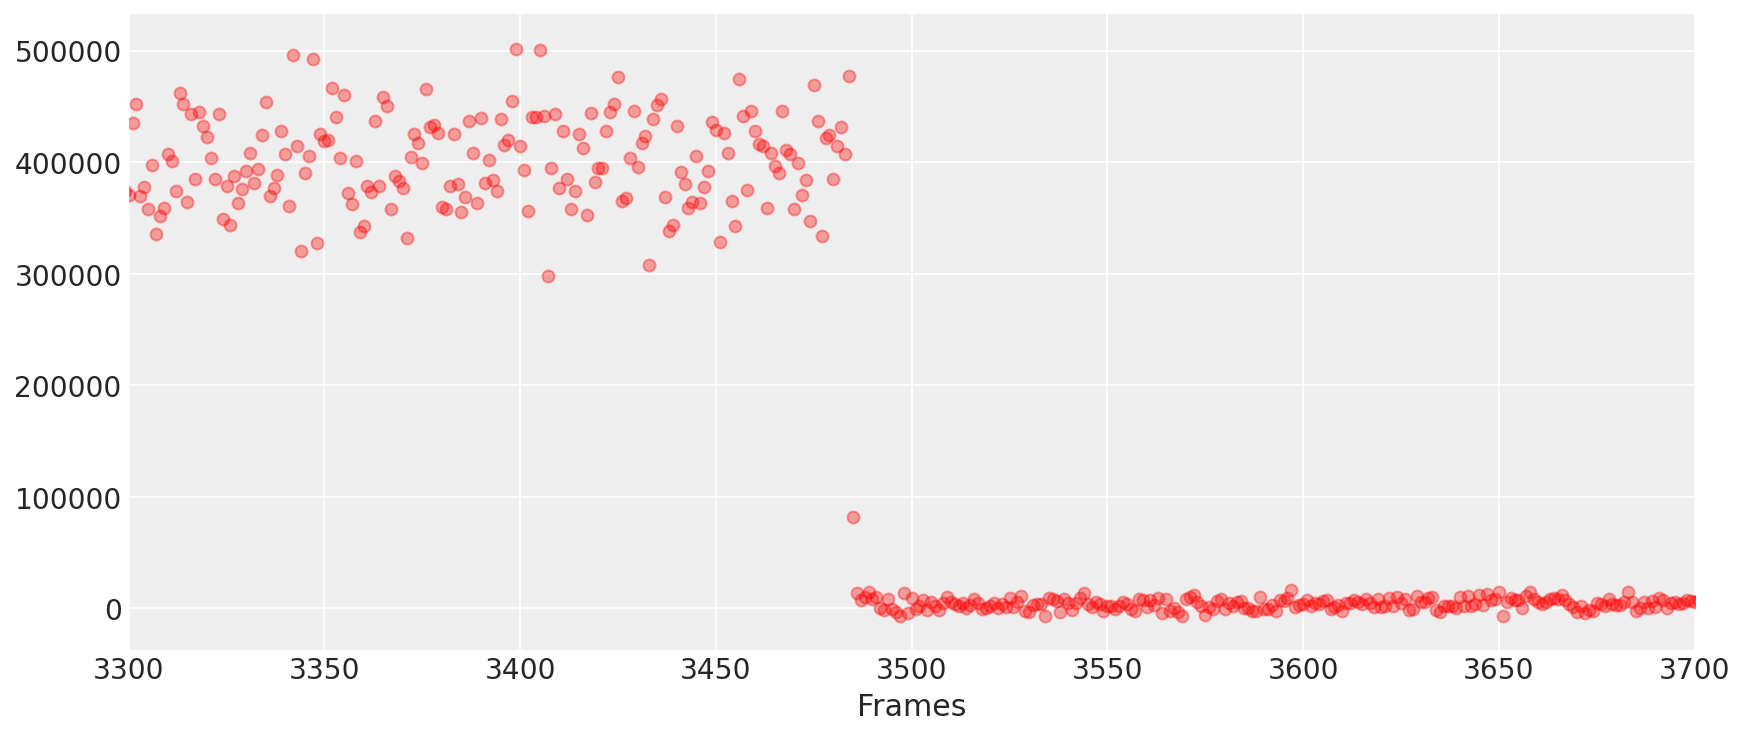

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data['Frame'], data['Value'], 'ro', alpha=0.35)
ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## Normalisasi data

In [7]:
data['value_scaled'] = data['Value']/(data['Value'].std()*2)
# value_scaled = (data['Value'] - data['Value'].mean()) / data['Value'].std()

Text(0.5, 0, 'Julian Date')

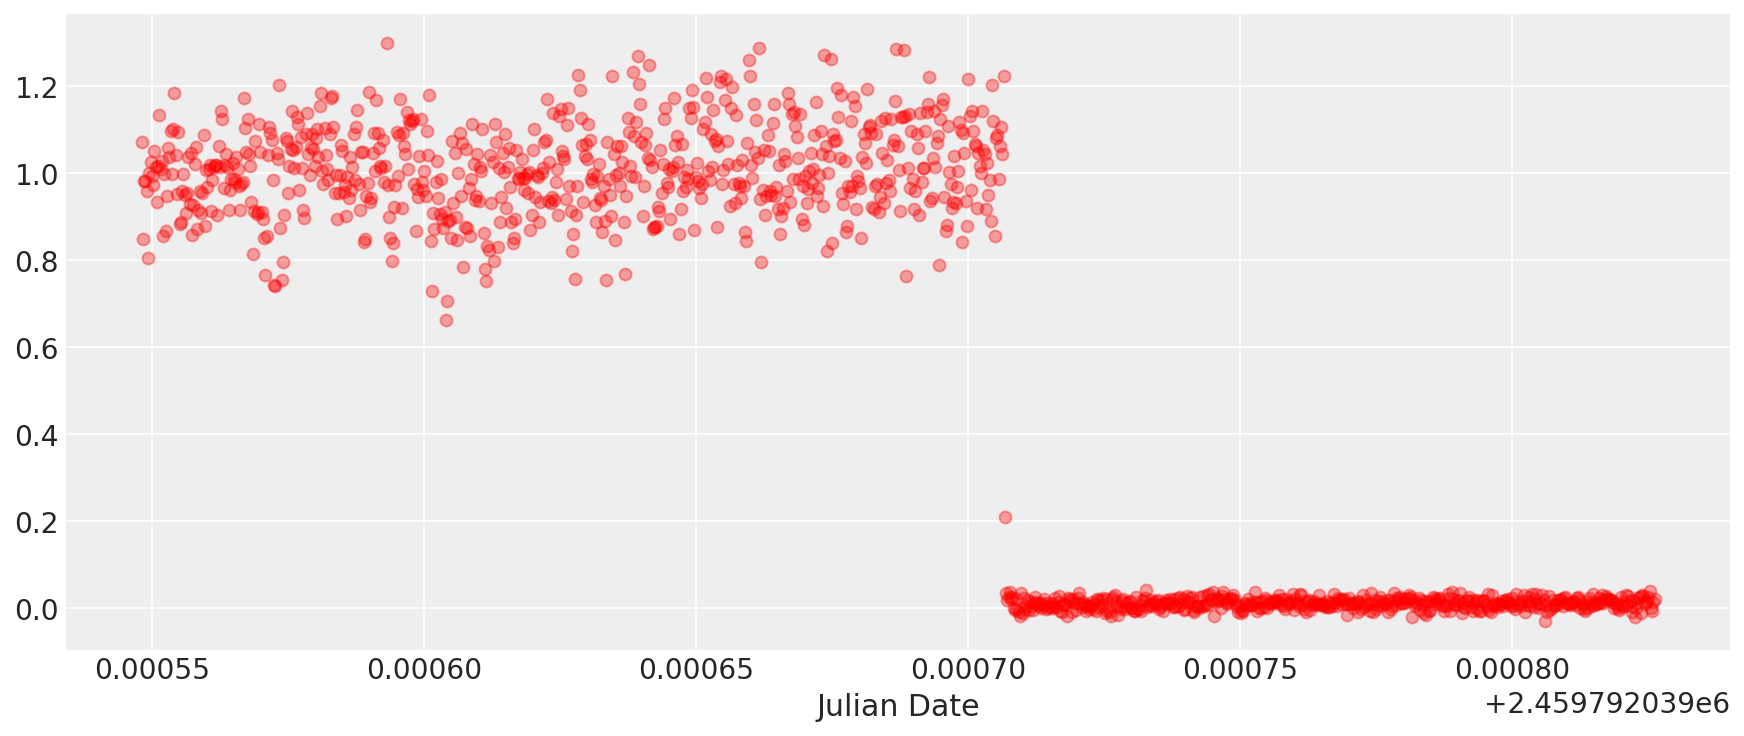

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
# fig, ax = plt.subplots()
# ax.plot(data['frac_JD'], value_scaled, 'ro', alpha=0.35)
ax.plot(data['JD'], data['value_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Julian Date')

## Tulis hasil normalisasi ke file `csv`

In [9]:
data.to_csv('lc_sao158379.csv', header=False, columns=['JD', 'value_scaled'], index=False, sep='\t')

## Siapkan kurva cahaya observasi untuk `SORA`

In [10]:
lc = LightCurve(name='SAO 158379', file='lc_sao158379.csv', exptime=0.02)

print(lc)

Light curve name: SAO 158379
Initial time: 2022-07-31 12:56:56.957 UTC
End time:     2022-07-31 12:57:20.984 UTC
Duration:     0.400 minutes
Time offset:  0.000 seconds

Exposure time:    0.0200 seconds
Cycle time:       0.0200 seconds
Num. data points: 1200


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




c:\Anaconda3\envs\work_pymc\lib\site-packages\sora\lightcurve\core.py:435: UserWarning: Exposure time (0.0200 seconds) higher than Cycle time (0.0200 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


(46628.0, 46633.0)

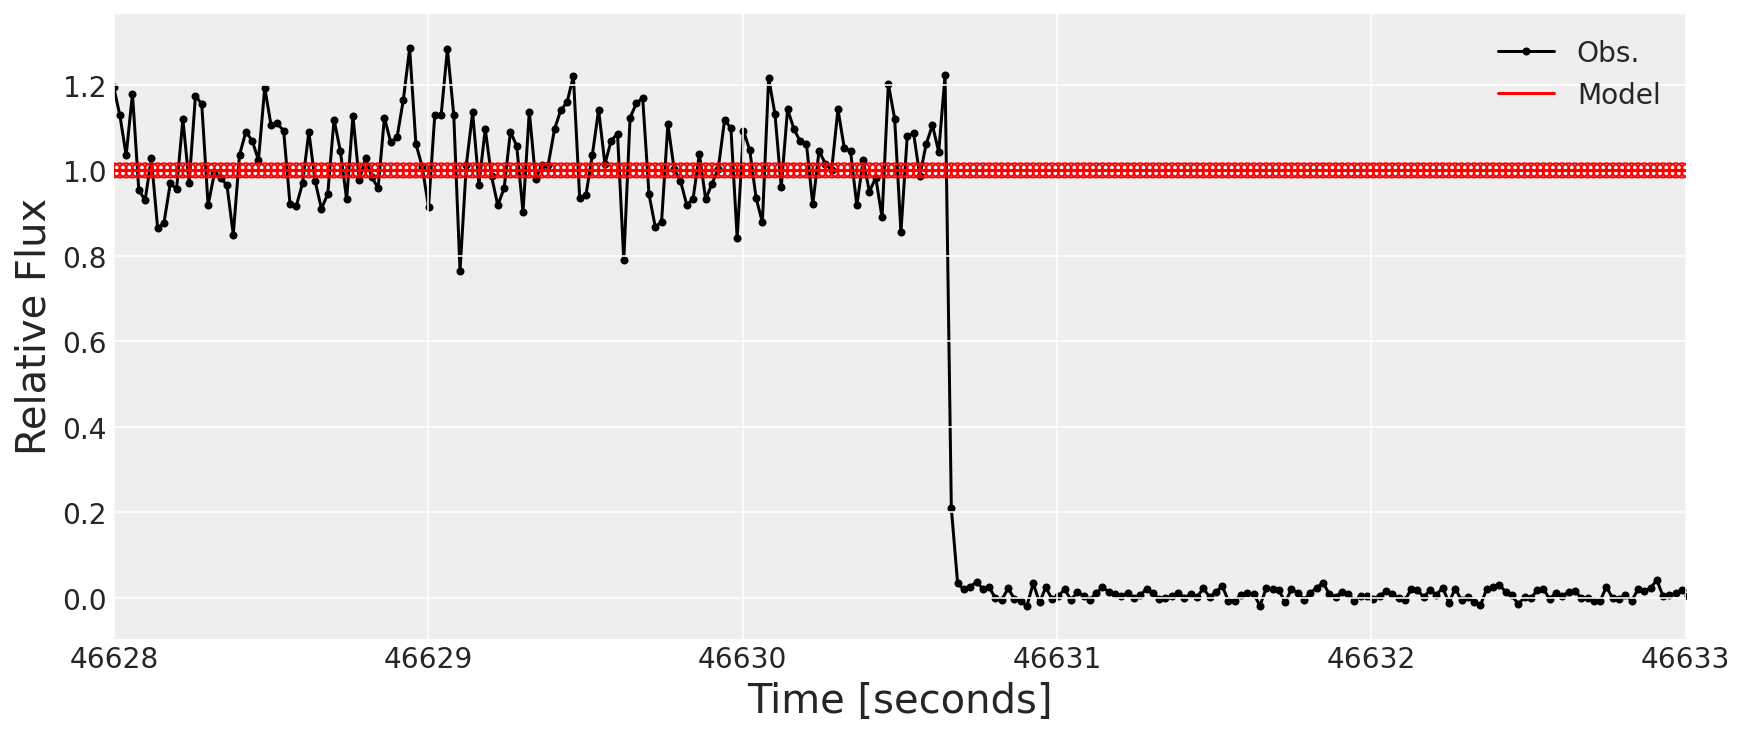

In [11]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 10.30787006020546,
 'central_time': 46635.81030987203,
 'immersion_time': 46630.65637484193,
 'emersion_time': 46640.964244902134,
 'time_err': 0.009997934103012085,
 'depth': 0.9955604166674817,
 'depth_err': 0.014653339305676206,
 'baseline': 1.0073860053388515,
 'baseline_err': 0.10992396886512888,
 'snr': 67.94085606697413,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

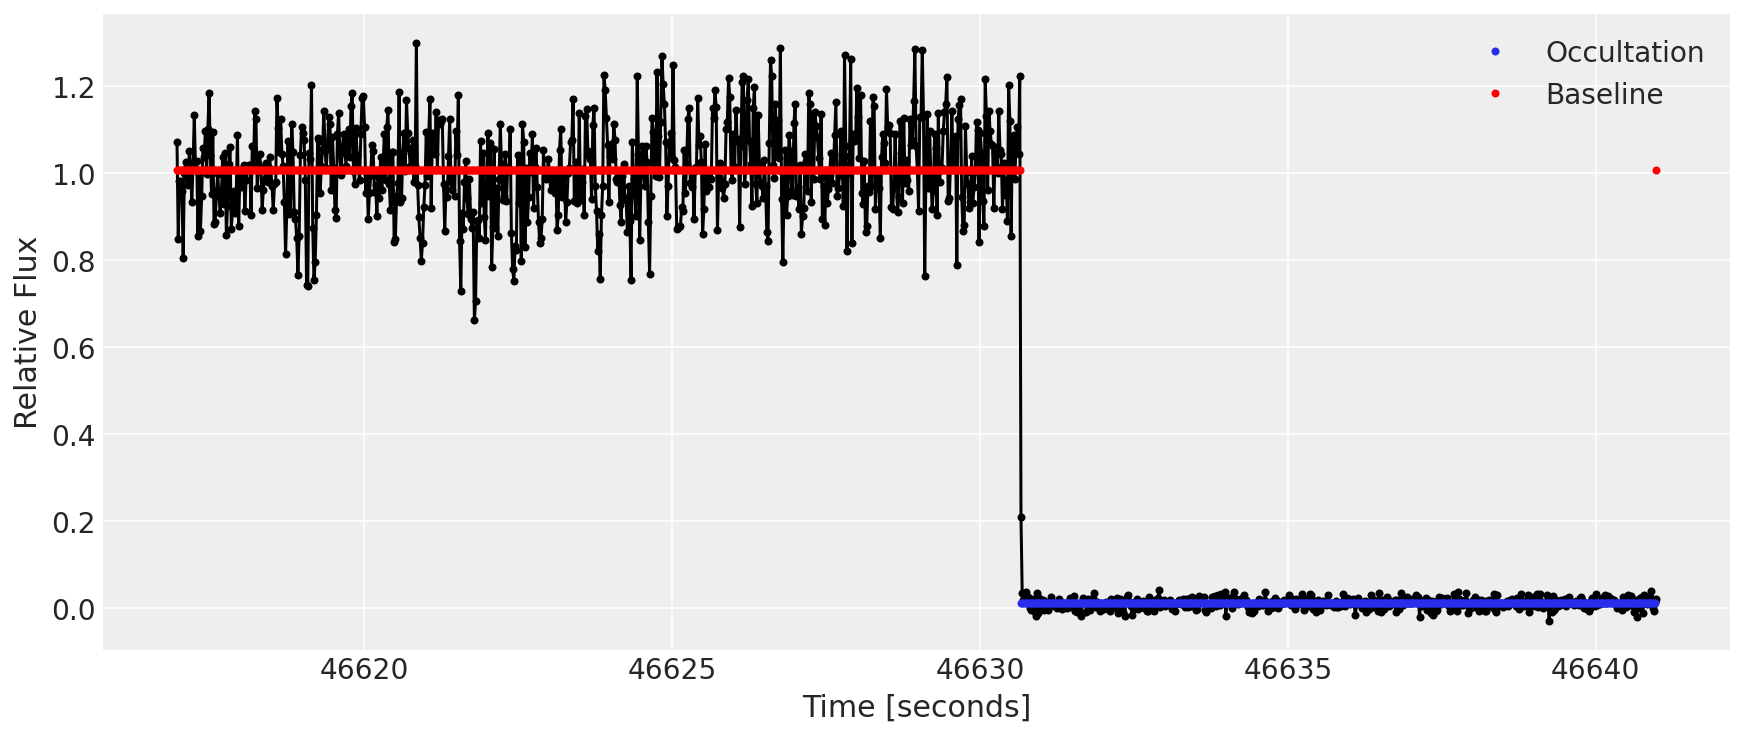

In [12]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

In [13]:
print('Exposure time:   {:.4f} s'.format(lc.exptime))
print('Cycle time:      {:.4f} s'.format(lc.cycle))

Exposure time:   0.0200 s
Cycle time:      0.0200 s


## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **8 Juli 2022 pukul 12:57:10.8 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [14]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 7, 8, 12, 57, 10.8)

In [15]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [16]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [17]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

14h 09m 16.19s
-11deg 29' 40.9"
0.002508805140826269


In [18]:
d_moon = distance.au
d_moon

0.002508805140826269

In [19]:
lc.set_dist(dist=d_moon)

lc.dist

0.002508805140826269

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [20]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [21]:
lc.fresnel_scale

0.010116848541815968

In [22]:
from sora import Star
from sora.star import kervella, van_belle

In [23]:
star = Star(coord='14 08 28.9833942240 -11 49 46.074088416')

c:\Anaconda3\envs\work_pymc\lib\site-packages\sora\star\core.py:335: UserWarning: This star has a RUWE of 5.87. Please be aware that its positions must be handled with care.
  warnings.warn('This star has a RUWE of {:.2f}. '.format(self.meta_gaia['RUWE']) +


1 Gaia-EDR3 star found G=6.837951
star coordinate at J2016.0: RA=14h08m28.96390s +/- 0.1816 mas, DEC=-11d49m46.1153s +/- 0.1503 mas



In [24]:
star.mag

{'G': 6.837951,
 'B': 6.951000213623047,
 'V': 6.849999904632568,
 'R': 6.789999961853027,
 'J': 6.6570000648498535,
 'H': 6.6519999504089355,
 'K': 6.611999988555908}

In [25]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-07-08 12:57:10.8', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

14h08m28.9553522601s -11d49m46.1289132474s


In [26]:
star.error_at(time='2022-07-08 12:57:10.8')

(<Quantity 1.68914101 mas>, <Quantity 1.23416072 mas>)

In [27]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00029685 km>

In [28]:
diameter.value

0.00029684942070417047

In [29]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s. kalikan angka ini dengan $\sin \theta$ di mana $\theta$ adalah sudut kontak (*contact angle*, CA). Pada pekerjaan ini, nilai kecepatan bayangan diambil dari perangkat lunak `OCCULT v4`

In [30]:
distance.km

375311.9070688234

In [31]:
from astropy.coordinates import Angle
# ang_vel = 0.55*u.arcsec # dalam arcsec/s

# lin_vel = distance.km * np.tan(ang_vel)

kms = u.km/u.s
lin_vel = 0.6476*kms # dari Occult v4

lin_vel

<Quantity 0.6476 km / s>

In [32]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 10.30787006020546,
 'central_time': 46635.81030987203,
 'immersion_time': 46630.65637484193,
 'emersion_time': 46640.964244902134,
 'time_err': 0.009997934103012085,
 'depth': 0.9955604166674817,
 'depth_err': 0.014653339305676206,
 'baseline': 1.0073860053388515,
 'baseline_err': 0.10992396886512888,
 'snr': 67.94085606697413,
 'occ_mask': array([False, False, False, ...,  True,  True, False])}

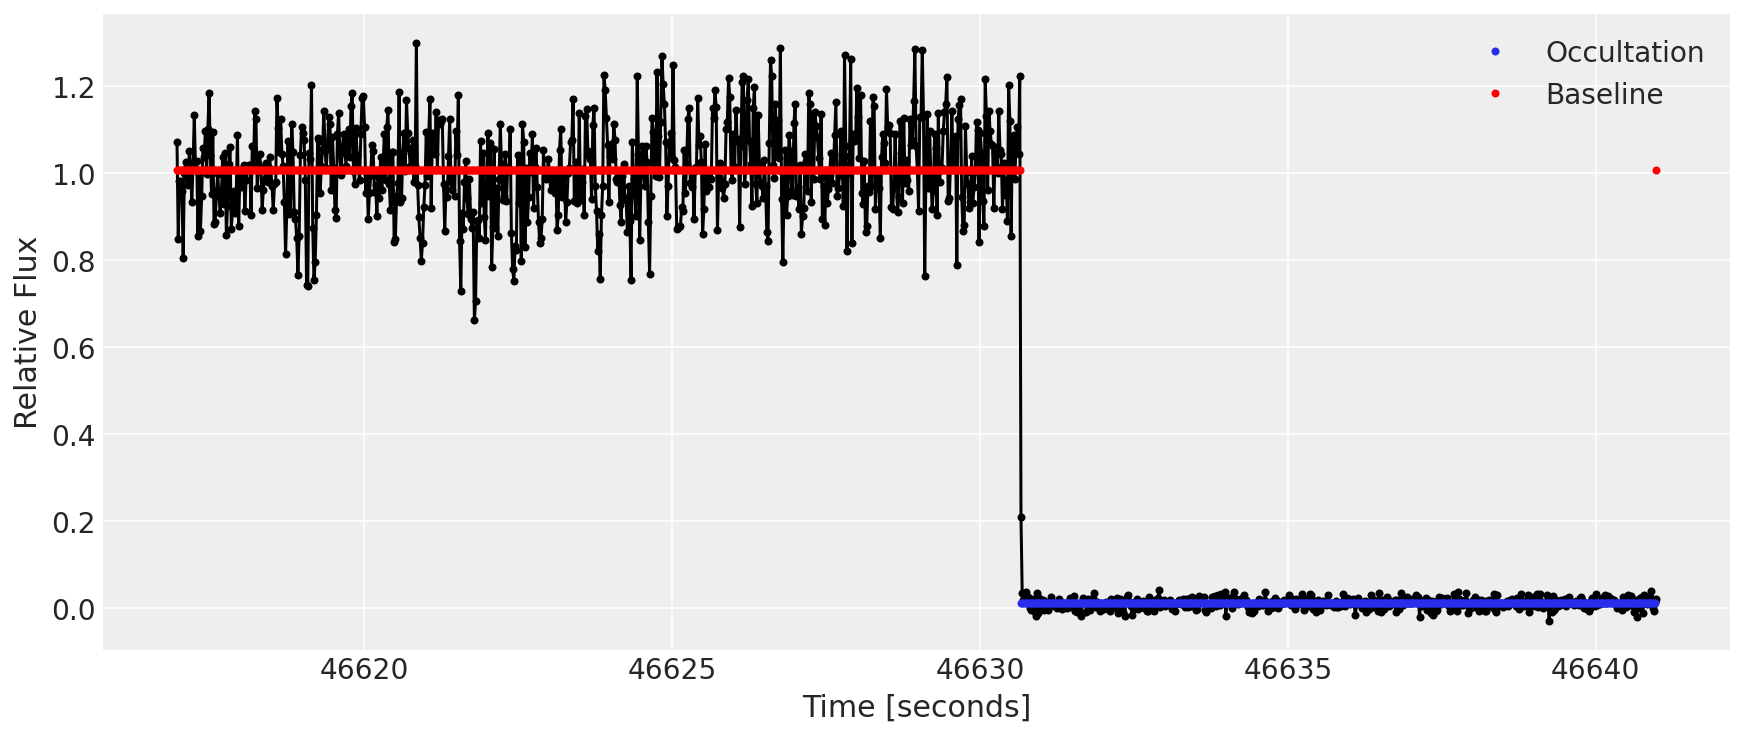

In [33]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)

tes2

**Parameter untuk model**

In [34]:
immersion_time = 46630.656  # seconds relative to tref
emersion_time  = 46670.000  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 10 # seconds relative to tref
tmax = immersion_time   + 10 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

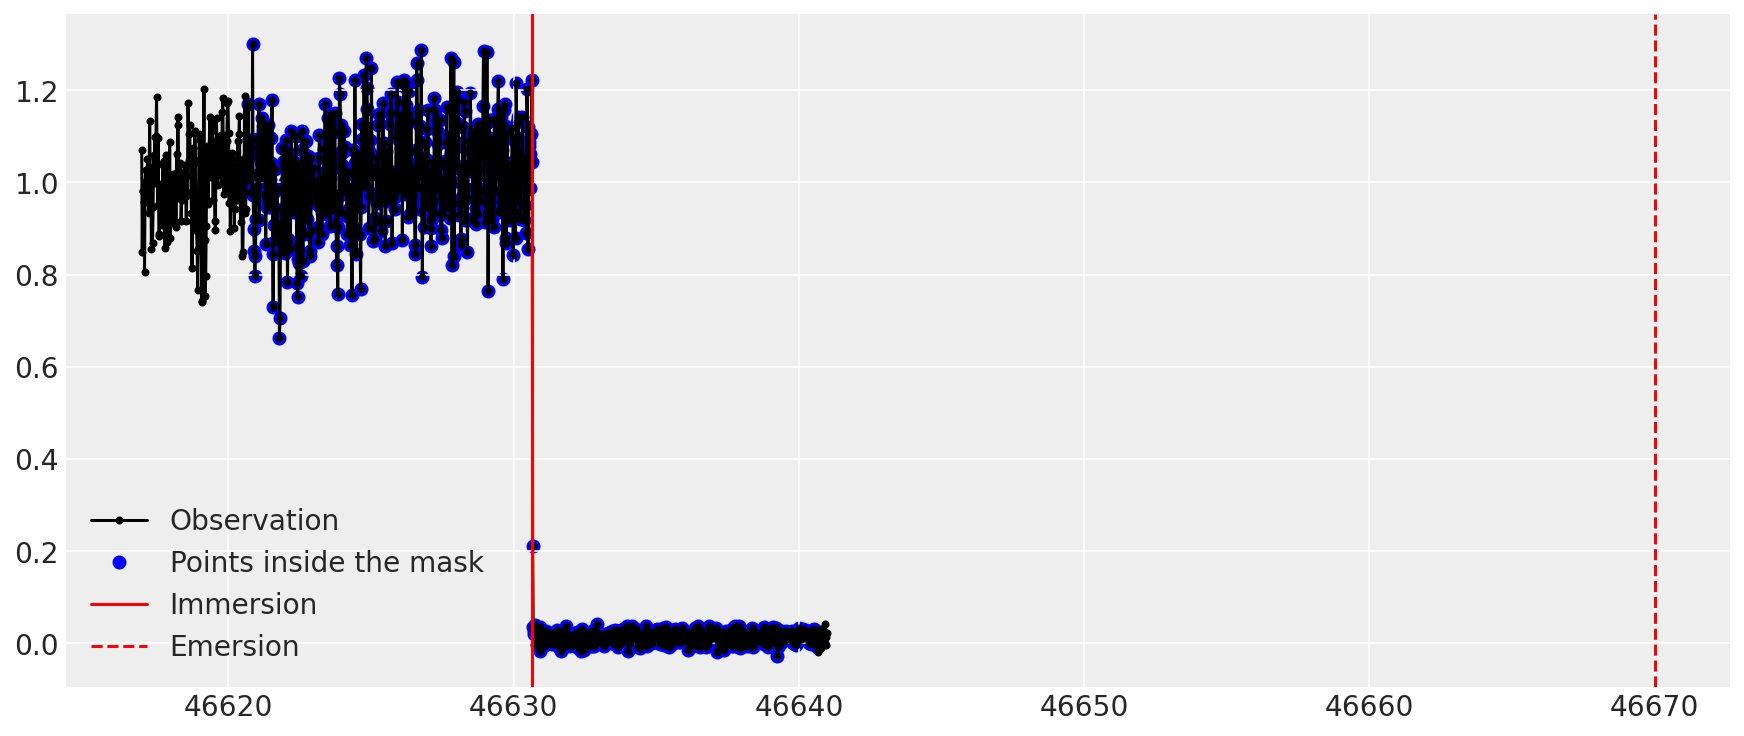

In [35]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()
# plt.show()

In [36]:
lc_chi2 = lc.occ_lcfit(loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [37]:
print(lc_chi2)

Minimum chi-square: 692.414
Number of fitted points: 1200
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.578

immersion:
    1-sigma: 46630.661 +/- 0.002
    3-sigma: 46630.662 +/- 0.006

emersion:
    1-sigma: 46641.001 +/- 0.009
    3-sigma: 46640.999 +/- 0.014



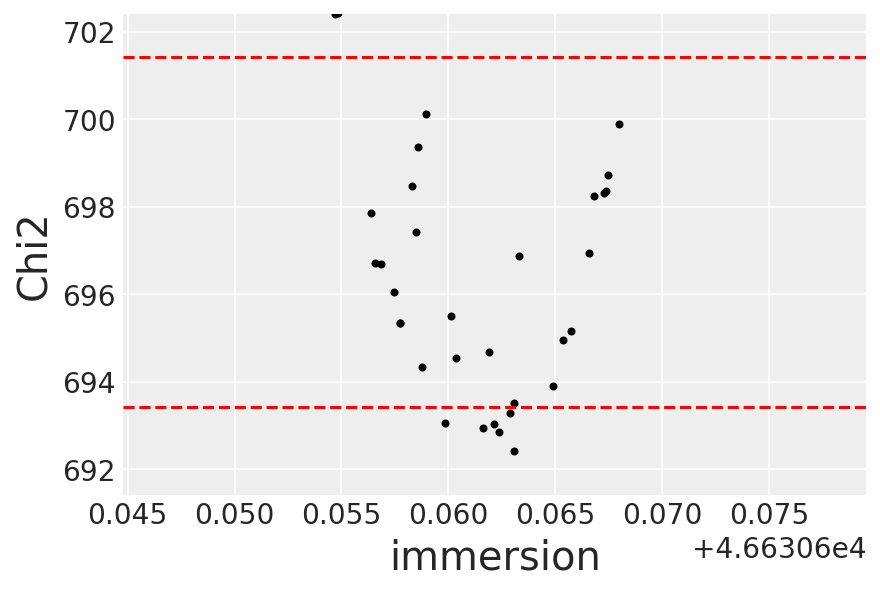

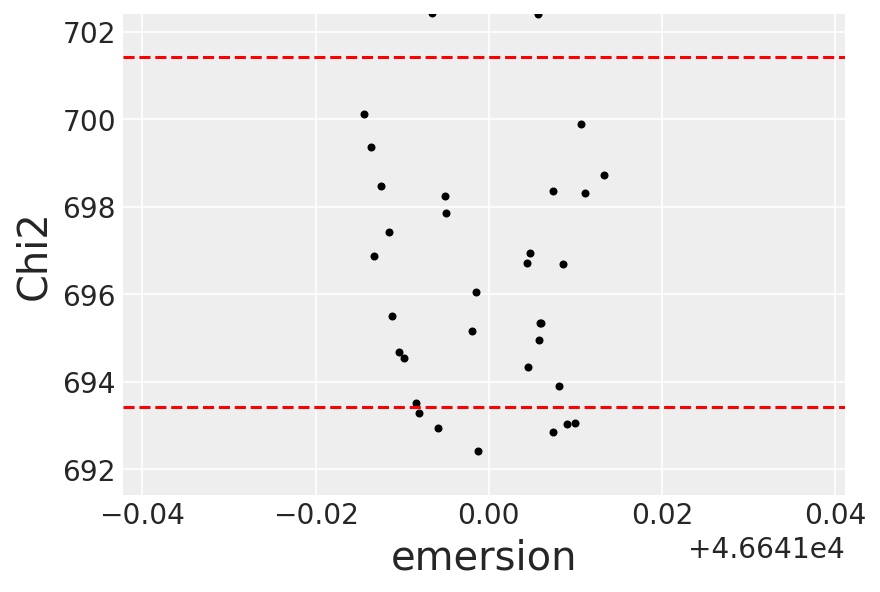

In [38]:
lc_chi2.plot_chi2()

(46628.0, 46633.0)

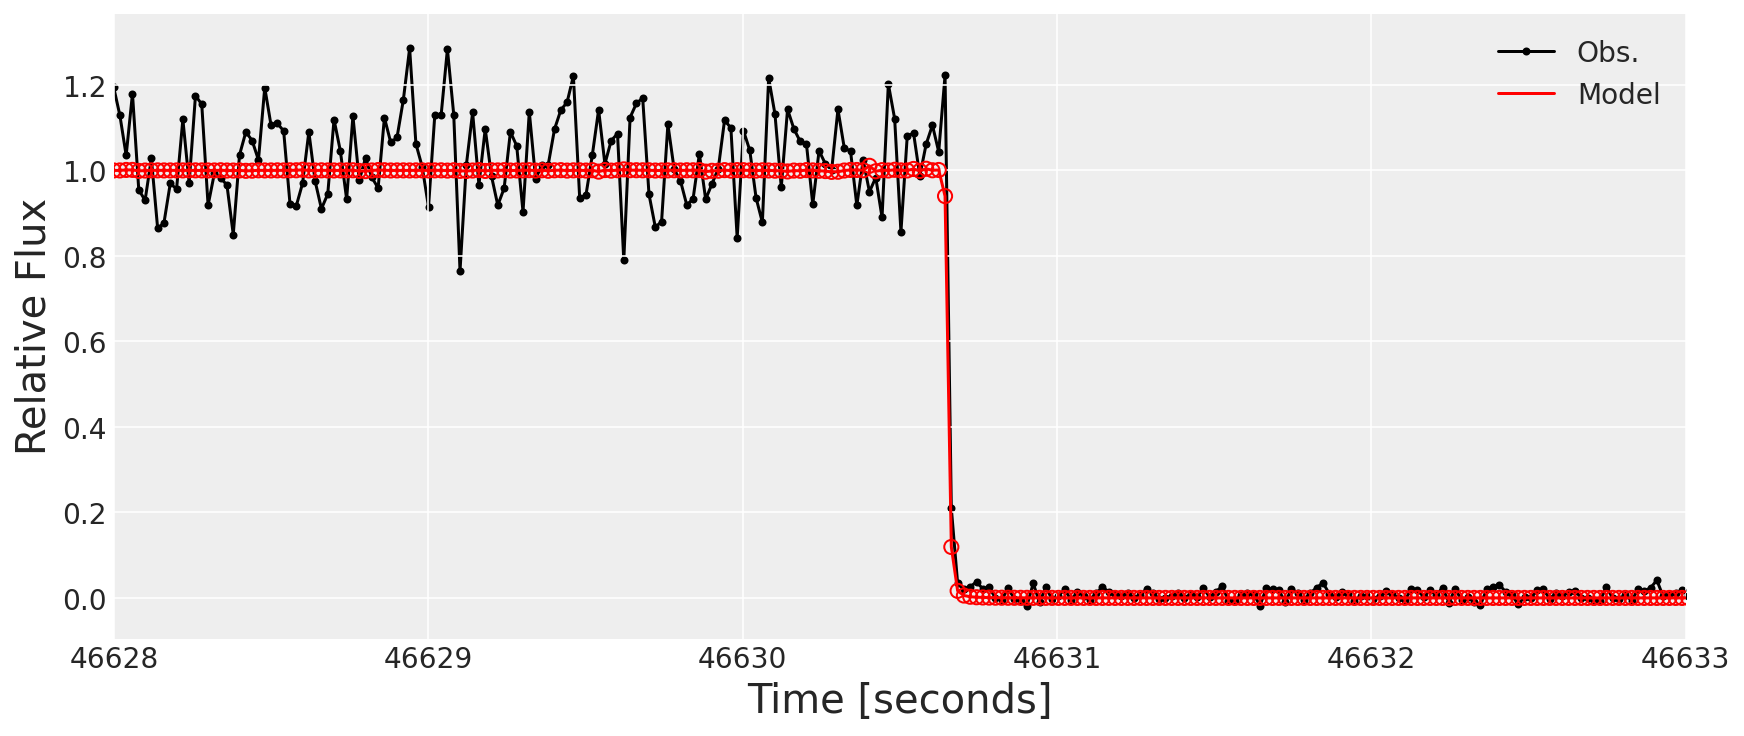

In [39]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
plt.xlim(46628,46633)


Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

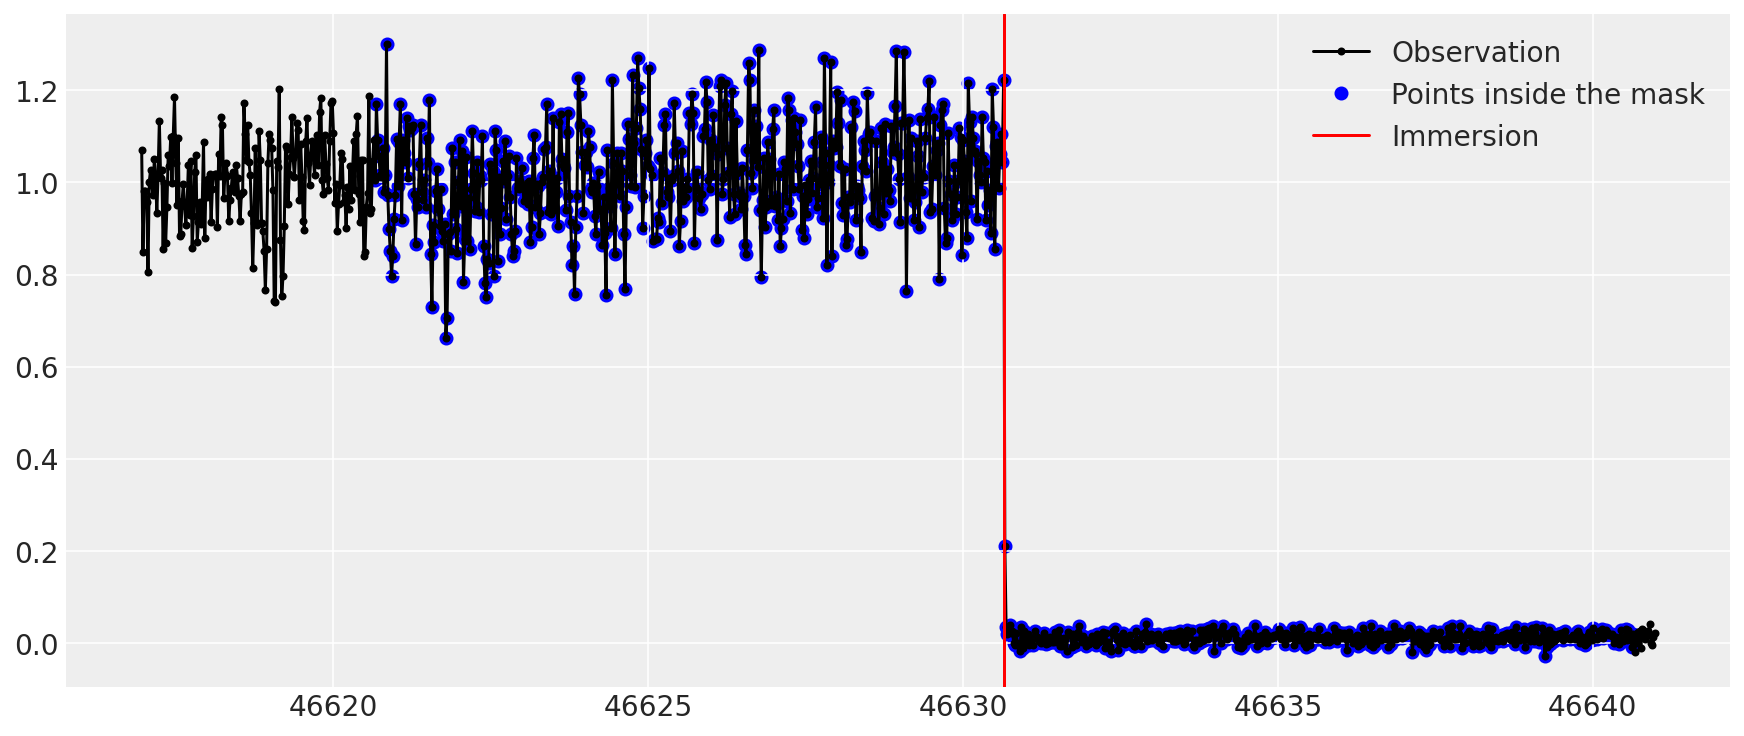

In [40]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [41]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [42]:
print(lc_chi2_imm)

Minimum chi-square: 506.603
Number of fitted points: 998
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.508

immersion:
    1-sigma: 46630.662 +/- 0.002
    3-sigma: 46630.662 +/- 0.007



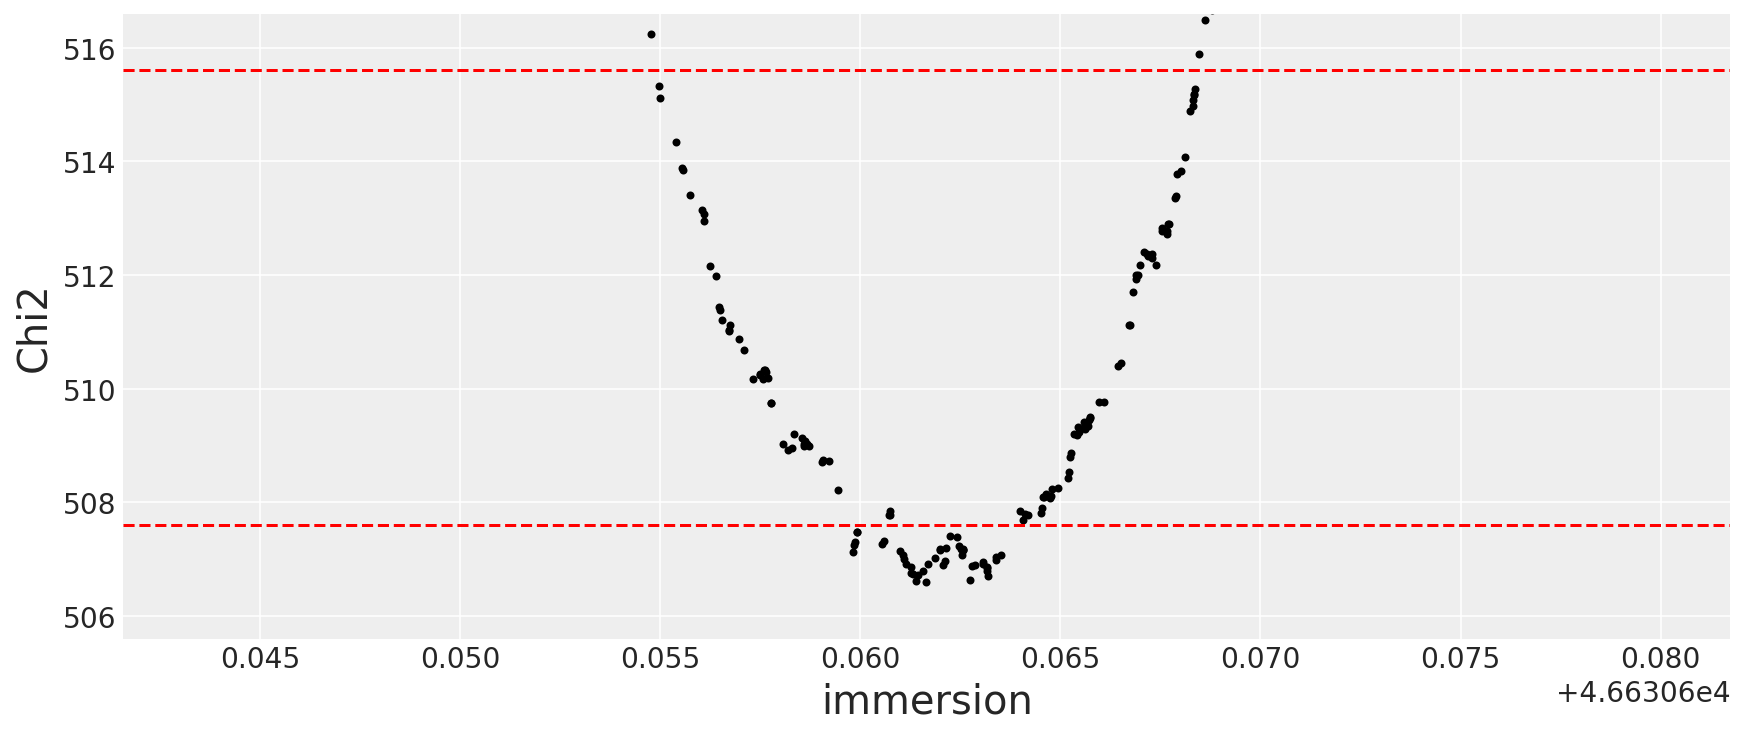

In [43]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [44]:
print(lc)

Light curve name: SAO 158379
Initial time: 2022-07-31 12:56:56.957 UTC
End time:     2022-07-31 12:57:20.984 UTC
Duration:     0.400 minutes
Time offset:  0.000 seconds

Exposure time:    0.0200 seconds
Cycle time:       0.0200 seconds
Num. data points: 1200

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.648 km/s
Fresnel scale:        0.016 seconds or 0.01 km
Stellar size effect:  0.000 seconds or 0.00 km
Inst. response:       0.020 seconds or 0.01 km
Dead time effect:     -0.000 seconds or -0.00 km
Model resolution:     0.002 seconds or 0.00 km
Modelled baseflux:    1.007
Modelled bottomflux:  0.004
Light curve sigma:    0.107

Immersion time: 2022-07-31 12:57:10.662 UTC +/- 0.002 seconds
Emersion time:  2022-07-31 12:57:21.001 UTC +/- 0.009 seconds

Monte Carlo chi square fit.

Minimum chi-square: 506.603
Number of fitted points: 998
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.508

immersion:
    1-s

(46630.0, 46631.5)

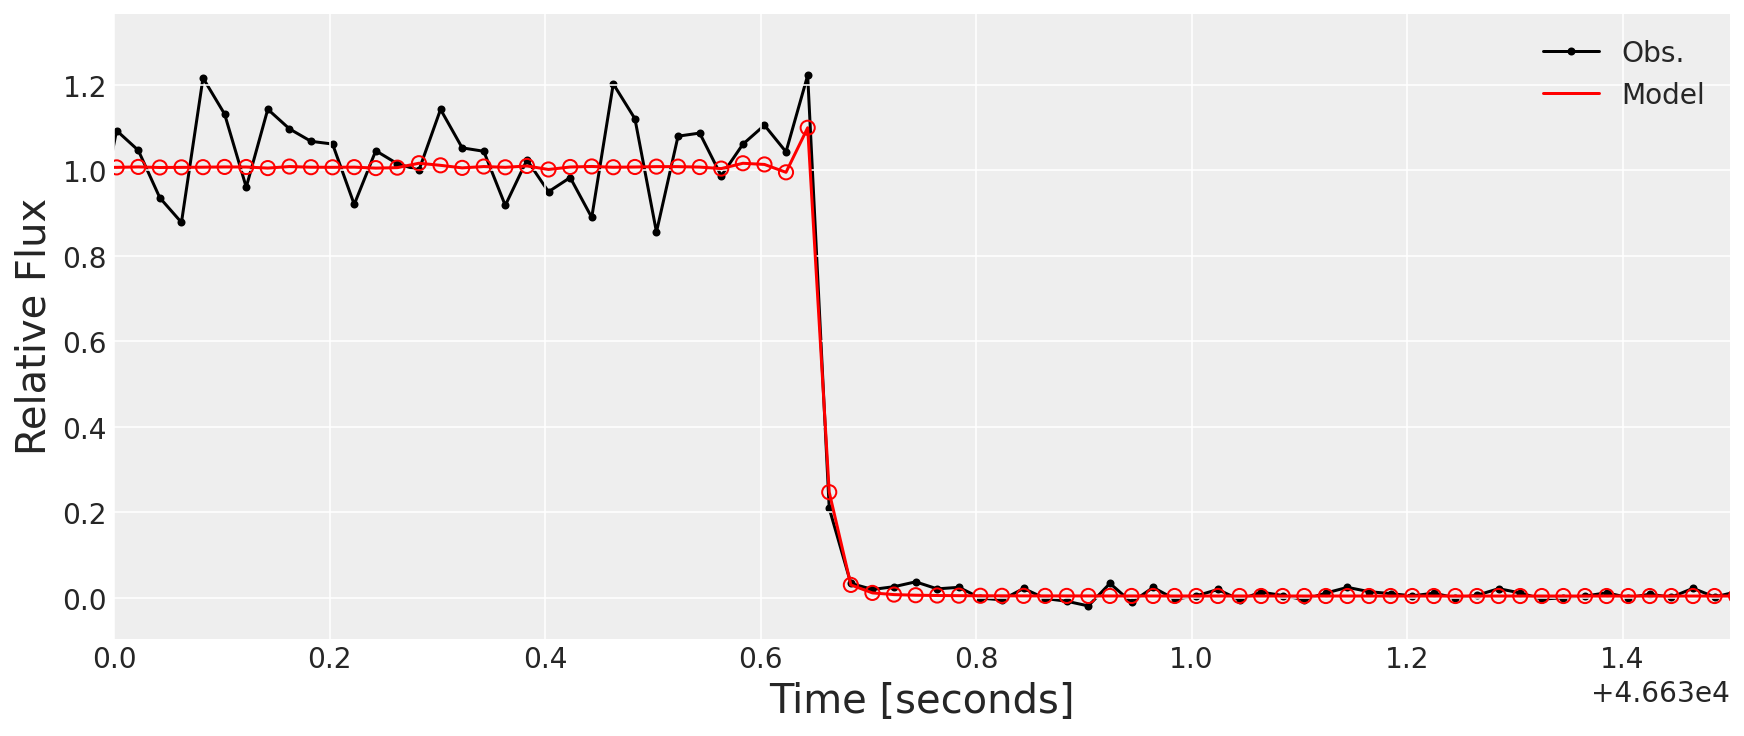

In [45]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(46630, 46631.5)

(-0.25, 1.5)

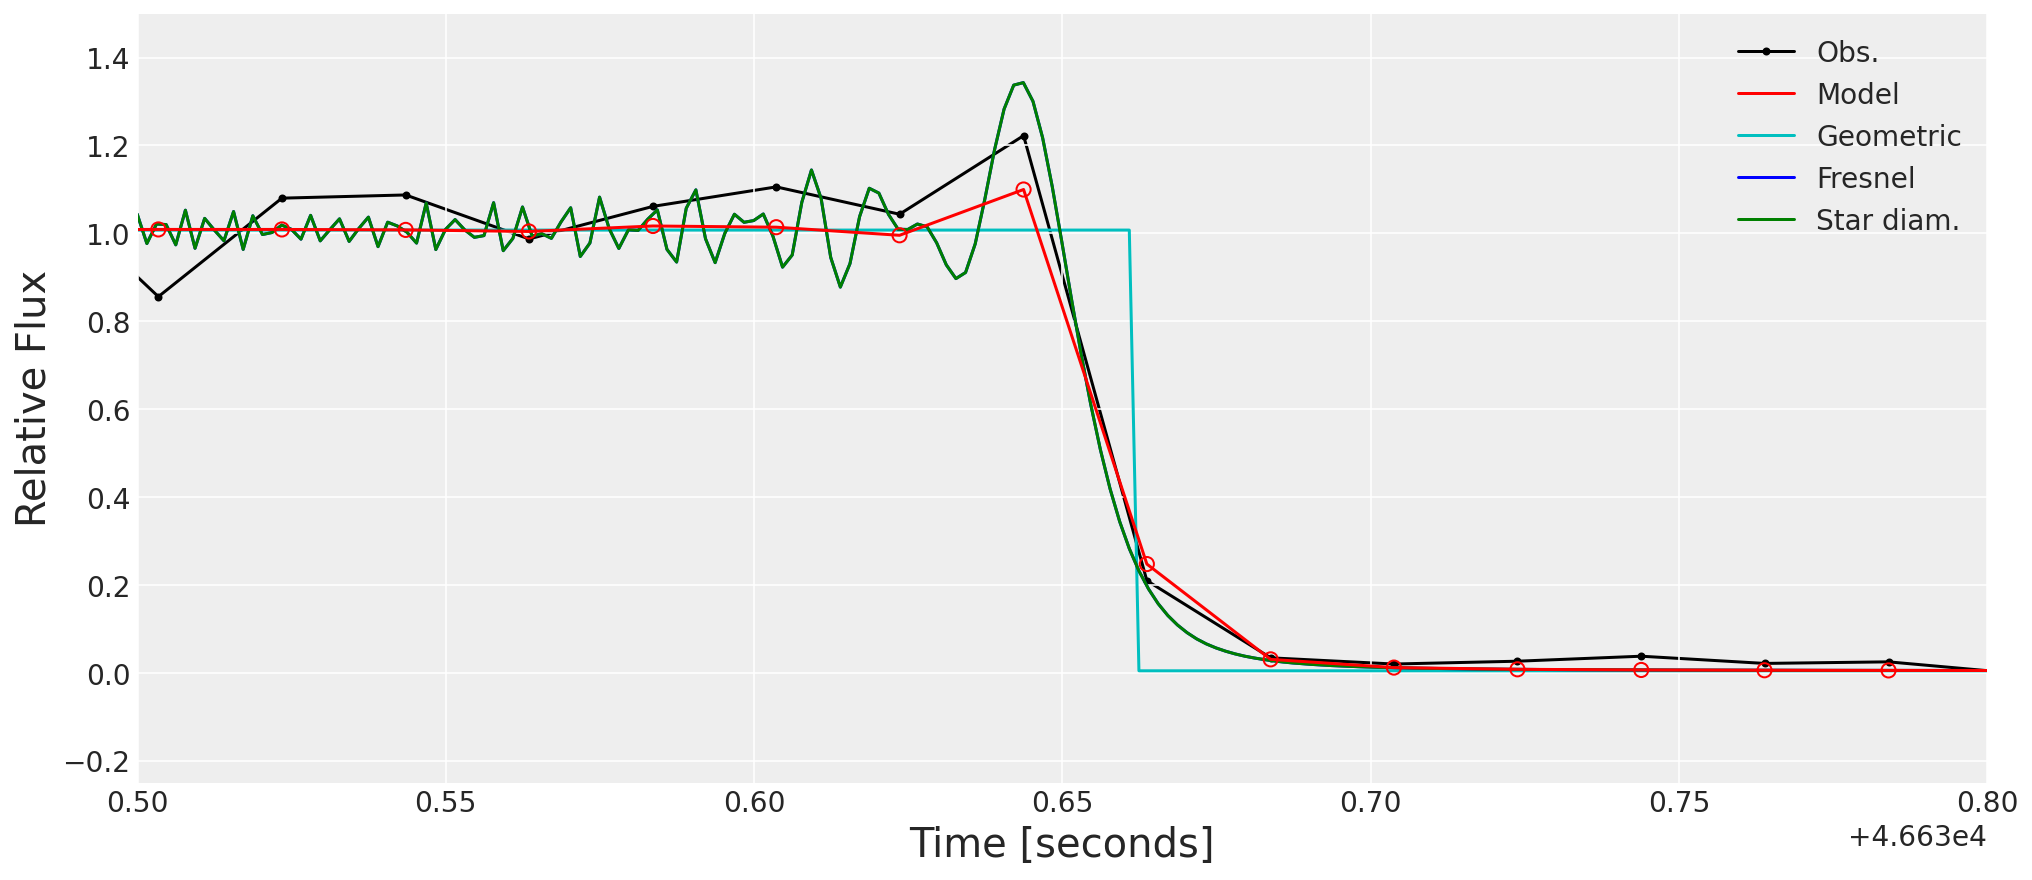

In [46]:
plt.figure(figsize=(14,6))
lc.plot_lc()
lc.plot_model()

plt.xlim(46630.5,46630.8)
plt.ylim(-0.25, 1.5)

In [47]:
lc.immersion

<Time object: scale='utc' format='iso' value=2022-07-31 12:57:10.662>